<a href="https://colab.research.google.com/github/DiogoBotton/FIAP_Heart_Disease/blob/dev/framingham_heart_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:


# Ajustes de estilo
%matplotlib inline
sns.set(style='whitegrid', palette='muted')

# Sunir arquivo no mesmo diretorio do notebook
file_path = "/content/framingham_heart_study.csv"

try:
    df = pd.read_csv(file_path)
    print("Dados carregados com sucesso! Formato:", df.shape)
    display(df.head())
except FileNotFoundError:
    print(f"Arquivo não encontrado em: {file_path}")
except pd.errors.ParserError as e:
    print("Erro ao parsear o CSV:", e)


Dados carregados com sucesso! Formato: (4240, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
# Dimensões
print(f'Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas')

# Primeiras linhas
display(df.head())

# Informação geral (tipos, não-nulos)
df.info()

# Estatísticas descritivas para variáveis numéricas
display(df.describe().T)

Dimensões: 4240 linhas x 16 colunas


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [12]:
# Quantidade e % de missing por coluna
missing = df.isna().sum()
pct = missing / len(df) * 100
pd.DataFrame({'missing': missing, '%': pct.round(2)}).sort_values('missing', ascending=False)


,missing,%
glucose,388,9.15
education,105,2.48
BPMeds,53,1.25
totChol,50,1.18
cigsPerDay,29,0.68
BMI,19,0.45
heartRate,1,0.02
male,0,0.00
prevalentHyp,0,0.00
prevalentStroke,0,0.00


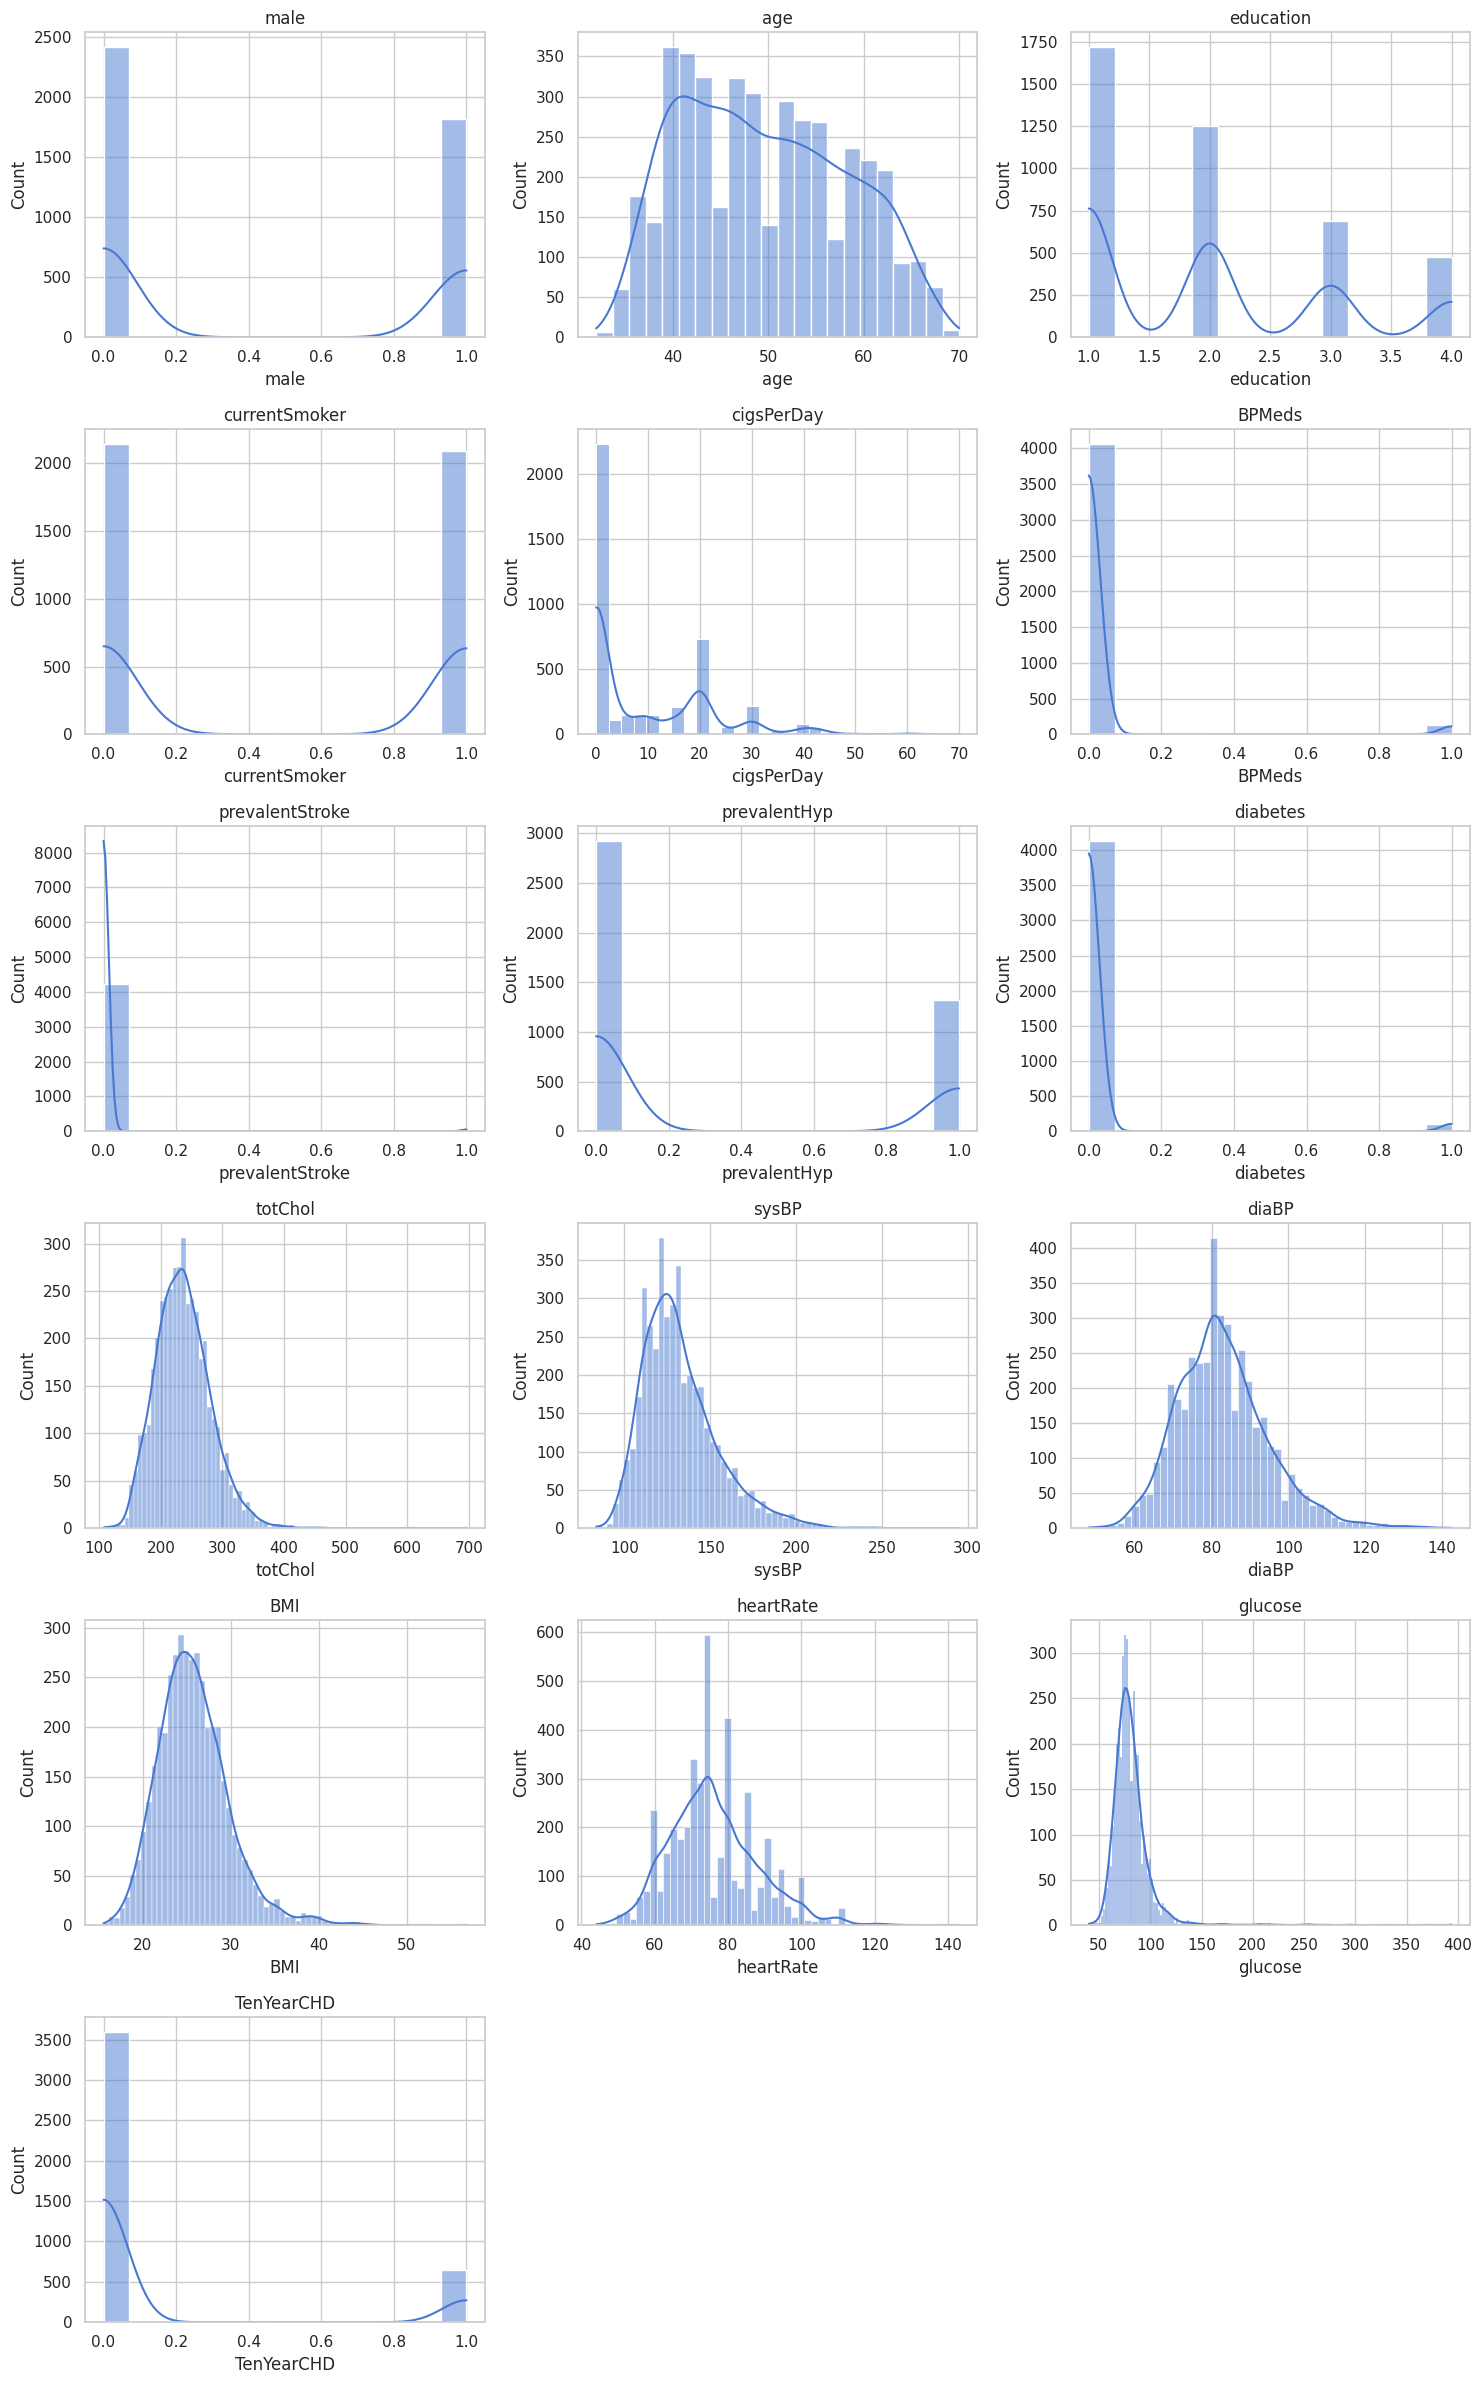

In [15]:
# Seleciona as colunas numéricas
num_cols = list(df.select_dtypes(include='number').columns)
n = len(num_cols)

# Define o número de colunas desejado para o grid (ex: 3) e calcula o número de linhas
cols = 3
rows = (n - 1) // cols + 1

# Ajusta o tamanho da figura dinamicamente
plt.figure(figsize=(cols * 5, rows * 4))

# Itera para criar cada subgráfico
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


Distribuição por Sexo:
male
0    57.08%
1    42.92%
Name: proportion, dtype: object

Estatísticas de Idade:
count    4240.000000
mean       49.580189
std         8.572942
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64

Hábitos de Fumar:
Proporção de Fumantes:
currentSmoker
0    50.59%
1    49.41%
Name: proportion, dtype: object


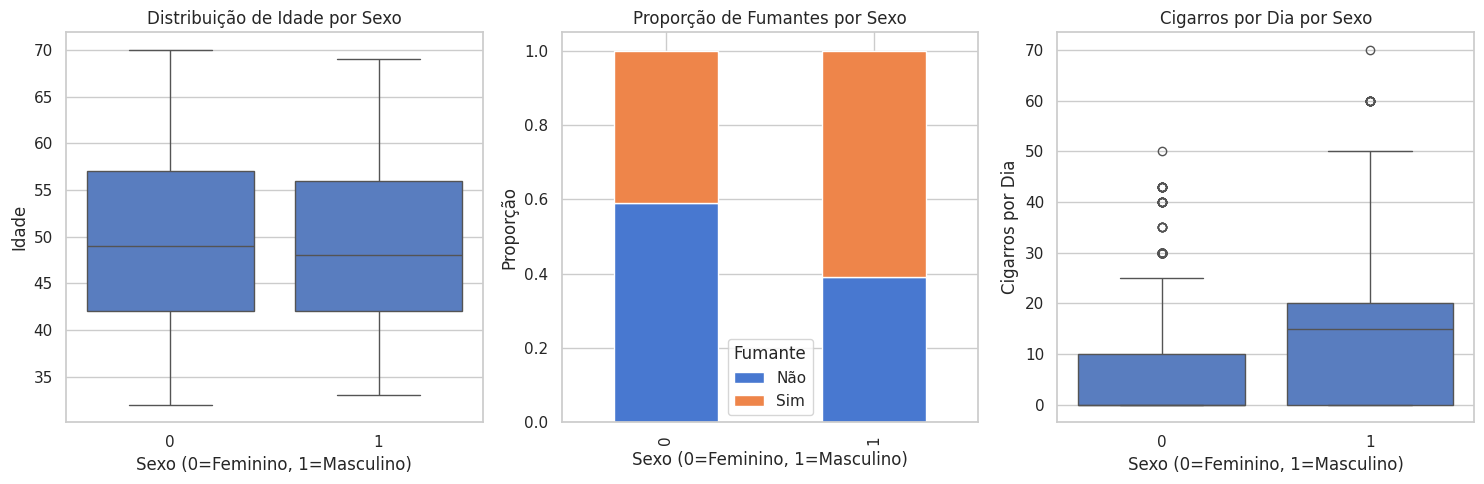


Idade Média por Status de Fumante:
currentSmoker
0    51.390210
1    47.726969
Name: age, dtype: float64

Cigarros por Dia - Estatísticas por Sexo:
       count       mean        std  min  25%   50%   75%   max
male                                                          
0     2405.0   5.729730   8.993534  0.0  0.0   0.0  10.0  50.0
1     1806.0  13.368771  13.801048  0.0  0.0  15.0  20.0  70.0


In [16]:
# 1. Análise Descritiva
print("Distribuição por Sexo:")
print(df['male'].value_counts(normalize=True).map('{:.2%}'.format))

print("\nEstatísticas de Idade:")
print(df['age'].describe())

print("\nHábitos de Fumar:")
print("Proporção de Fumantes:")
print(df['currentSmoker'].value_counts(normalize=True).map('{:.2%}'.format))

# 2. Visualizações Cruzadas
plt.figure(figsize=(15,5))

# Idade por Sexo
plt.subplot(1,3,1)
sns.boxplot(x='male', y='age', data=df)
plt.title('Distribuição de Idade por Sexo')
plt.xlabel('Sexo (0=Feminino, 1=Masculino)')
plt.ylabel('Idade')

# Fumantes por Sexo
plt.subplot(1,3,2)
smoke_by_sex = pd.crosstab(df['male'], df['currentSmoker'], normalize='index')
smoke_by_sex.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Proporção de Fumantes por Sexo')
plt.xlabel('Sexo (0=Feminino, 1=Masculino)')
plt.ylabel('Proporção')
plt.legend(title='Fumante', labels=['Não', 'Sim'])

# Cigarros por Dia por Sexo
plt.subplot(1,3,3)
sns.boxplot(x='male', y='cigsPerDay', data=df)
plt.title('Cigarros por Dia por Sexo')
plt.xlabel('Sexo (0=Feminino, 1=Masculino)')
plt.ylabel('Cigarros por Dia')

plt.tight_layout()
plt.show()

# 3. Análise Detalhada de Idade e Tabagismo
print("\nIdade Média por Status de Fumante:")
print(df.groupby('currentSmoker')['age'].mean())

print("\nCigarros por Dia - Estatísticas por Sexo:")
print(df.groupby('male')['cigsPerDay'].describe())


/tmp/ipython-input-2322274494.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=idade_media_por_fumante.index, y=idade_media_por_fumante.values, palette=['skyblue', 'lightcoral'])


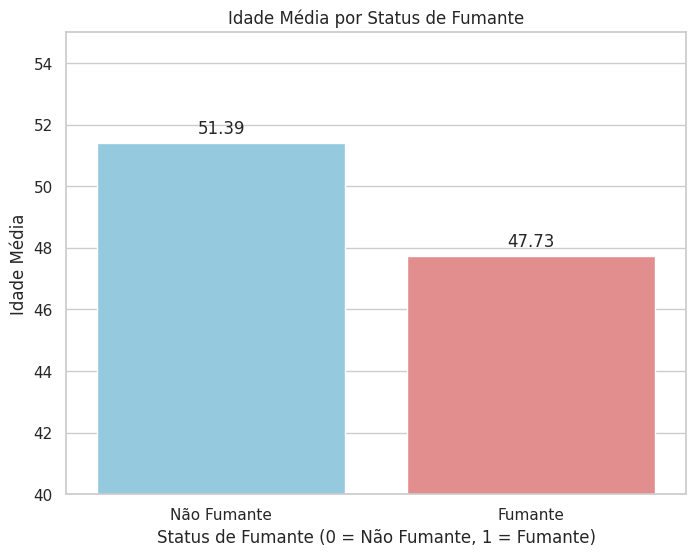

In [19]:
# Calcula a idade média por status de fumante e armazena na variável
idade_media_por_fumante = df.groupby('currentSmoker')['age'].mean()

# Cria o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=idade_media_por_fumante.index, y=idade_media_por_fumante.values, hue=idade_media_por_fumante.index, palette=['skyblue', 'lightcoral'], legend=False)

# Adiciona rótulos e título
plt.title('Idade Média por Status de Fumante')
plt.xlabel('Status de Fumante (0 = Não Fumante, 1 = Fumante)')
plt.ylabel('Idade Média')
plt.xticks([0, 1], ['Não Fumante', 'Fumante'])  # Define os rótulos do eixo x
plt.ylim(40, 55) # Ajusta a escala do eixo y

# Adiciona os valores no topo das barras
for i, valor in enumerate(idade_media_por_fumante.values):
    plt.text(i, valor + 0.2, f'{valor:.2f}', ha='center', va='bottom')

plt.show()